### **Proyecto final**

In [1]:
import pandas as pd

df = pd.read_csv("dataset_educacion.csv")

### **Limpieza de datos**

In [2]:
# Verificar los tipos de datos

df.dtypes

AÑO                              int64
CÓDIGO_MUNICIPIO                 int64
MUNICIPIO                       object
CÓDIGO_DEPARTAMENTO              int64
DEPARTAMENTO                    object
CÓDIGO_ETC                     float64
ETC                             object
POBLACIÓN_5_16                  object
TASA_MATRICULACIÓN_5_16        float64
COBERTURA_NETA                 float64
COBERTURA_NETA_TRANSICIÓN      float64
COBERTURA_NETA_PRIMARIA        float64
COBERTURA_NETA_SECUNDARIA      float64
COBERTURA_NETA_MEDIA           float64
COBERTURA_BRUTA                float64
COBERTURA_BRUTA_TRANSICIÓN     float64
COBERTURA_BRUTA_PRIMARIA       float64
COBERTURA_BRUTA_SECUNDARIA     float64
COBERTURA_BRUTA_MEDIA          float64
TAMAÑO_PROMEDIO_DE_GRUPO       float64
SEDES_CONECTADAS_A_INTERNET    float64
DESERCIÓN                      float64
DESERCIÓN_TRANSICIÓN           float64
DESERCIÓN_PRIMARIA             float64
DESERCIÓN_SECUNDARIA           float64
DESERCIÓN_MEDIA          

La variable **POBLACIÓN_5_16** reprensenta datos cuantitativos, por lo cual se convierte su formato a numérico. 

In [3]:
# Cambiar el tipo de dato

df['POBLACIÓN_5_16'] = df['POBLACIÓN_5_16'].str.replace(',', '').astype(float)

In [4]:
# Verificar la proporción de faltantes en el dataset

porcentaje_nulos = round(df.isnull().sum() / len(df),2).sort_values(ascending=False)
porcentaje_nulos

TAMAÑO_PROMEDIO_DE_GRUPO       0.48
SEDES_CONECTADAS_A_INTERNET    0.47
DESERCIÓN_TRANSICIÓN           0.06
DESERCIÓN_MEDIA                0.05
DESERCIÓN_SECUNDARIA           0.02
DESERCIÓN_PRIMARIA             0.02
COBERTURA_NETA_SECUNDARIA      0.01
COBERTURA_NETA                 0.01
TASA_MATRICULACIÓN_5_16        0.01
REPITENCIA_TRANSICIÓN          0.01
REPITENCIA_PRIMARIA            0.01
REPROBACIÓN                    0.01
APROBACIÓN_MEDIA               0.01
REPROBACIÓN_TRANSICIÓN         0.01
REPROBACIÓN_MEDIA              0.01
REPROBACIÓN_SECUNDARIA         0.01
REPROBACIÓN_PRIMARIA           0.01
COBERTURA_NETA_MEDIA           0.01
COBERTURA_BRUTA_MEDIA          0.01
COBERTURA_BRUTA_TRANSICIÓN     0.01
COBERTURA_BRUTA_PRIMARIA       0.01
COBERTURA_BRUTA_SECUNDARIA     0.01
DESERCIÓN                      0.01
APROBACIÓN_TRANSICIÓN          0.01
COBERTURA_NETA_PRIMARIA        0.01
REPITENCIA_MEDIA               0.01
REPITENCIA                     0.01
REPITENCIA_SECUNDARIA       

Los registros faltantes de las columnas **TAMAÑO_PROMEDIO_DE_GRUPO** y **SEDES_CONECTADAS_A_INTERNET** representan casi el 50% del tamaño del dataset. Se determina eliminarlas, puesto que no hacen parte del objetivo planteado.

In [5]:
# Eliminar columnas irrelevantes

df = df.drop(['TAMAÑO_PROMEDIO_DE_GRUPO','SEDES_CONECTADAS_A_INTERNET'], axis = 1)

In [6]:
# Rellenar con la mediana valores faltantes en las columnas numéricas

num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [7]:
# Verificar nuevamente faltantes

num_nulos = df.isnull().sum().sum()
print(f"Hay {num_nulos} valores faltantes en el dataset.")

Hay 0 valores faltantes en el dataset.


In [8]:
# Verificar los valores únicos en la culumna 'DEPARTAMENTO'

df['DEPARTAMENTO'].unique()

array(['Antioquia', 'Atlántico', 'Bogotá, D.C.', 'Bolívar', 'Boyacá',
       'Caldas', 'Caquetá', 'Cauca', 'Cesar', 'Córdoba', 'Cundinamarca',
       'Chocó', 'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Nariño',
       'Norte de Santander', 'Quindio', 'Risaralda', 'Santander', 'Sucre',
       'Tolima', 'Valle del Cauca', 'Arauca', 'Casanare', 'Putumayo',
       'Archipiélago de San Andrés, Providencia y Santa Catalina',
       'Amazonas', 'Guainía', 'Guaviare', 'Vaupés', 'Vichada', 'NACIONAL',
       'Bogotá D.C.',
       'Archipiélago de San Andrés. Providencia y Santa Catalina'],
      dtype=object)

In [9]:
# Estandarizar departamentos

correcciones = {
    'Bogotá, D.C.': 'Bogotá D.C.',
    'Archipiélago de San Andrés, Providencia y Santa Catalina': 'Archipiélago de San Andrés. Providencia y Santa Catalina',
}

df['DEPARTAMENTO'] = df['DEPARTAMENTO'].replace(correcciones)

In [10]:
# Eliminar filas donde 'DEPARTAMENTO' sea NACIONAL

df = df[df['DEPARTAMENTO'] != 'NACIONAL']

### Estadística descriptiva **(EDA)**

In [11]:
import matplotlib.pyplot as plt

In [12]:
# Analizar estadísticas básicas

df.describe()

,AÑO,CÓDIGO_MUNICIPIO,CÓDIGO_DEPARTAMENTO,CÓDIGO_ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
count,14582.000000,14582.000000,14582.000000,14582.000000,1.458200e+04,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,...,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000
mean,2016.998766,38701.064120,38.267247,3541.731857,8.302305e+03,84.992045,85.577053,57.704857,82.585178,69.926184,...,4.756870,0.483803,3.881868,6.805669,4.121398,3.288975,0.933135,3.157061,4.310828,1.690343
std,3.741511,26551.444571,26.564947,1125.600361,4.556071e+04,18.478310,16.825936,16.150646,17.111551,18.746043,...,3.987597,1.648629,3.790051,6.131181,4.192051,3.355109,2.404131,3.627971,4.527894,2.274741
min,2011.000000,5001.000000,5.000000,3.758000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,15676.000000,15.000000,3769.000000,1.165000e+03,74.950000,76.962500,47.590000,73.310000,60.500000,...,0.950000,0.000000,0.430000,0.762500,0.682500,0.730000,0.000000,0.600000,0.750000,0.000000
50%,2017.000000,25839.000000,25.000000,3785.000000,2.641000e+03,85.330000,86.400000,57.900000,82.830000,70.900000,...,4.520000,0.000000,3.330000,6.160000,3.100000,2.160000,0.000000,1.880000,2.740000,0.870000
75%,2020.000000,66572.000000,66.000000,3805.000000,5.862750e+03,95.307500,94.477500,68.000000,91.867500,80.500000,...,7.397500,0.210000,5.980000,10.790000,6.360000,5.047500,0.920000,4.550000,6.770000,2.530000
max,2023.000000,99773.000000,99.000000,10930.000000,1.479334e+06,279.030000,264.540000,150.470000,254.960000,229.440000,...,49.390000,52.710000,51.970000,76.970000,67.860000,37.470000,50.000000,50.760000,55.070000,36.450000


Se hace uso del método `describe()` para obtener una visión rápida de la presencia de outliers en el conjunto de datos. Se observa que, la diferencia entre el mínimo y el máximo, y entre la media y el valor máximo sugieren la presencia de datos atípicos.

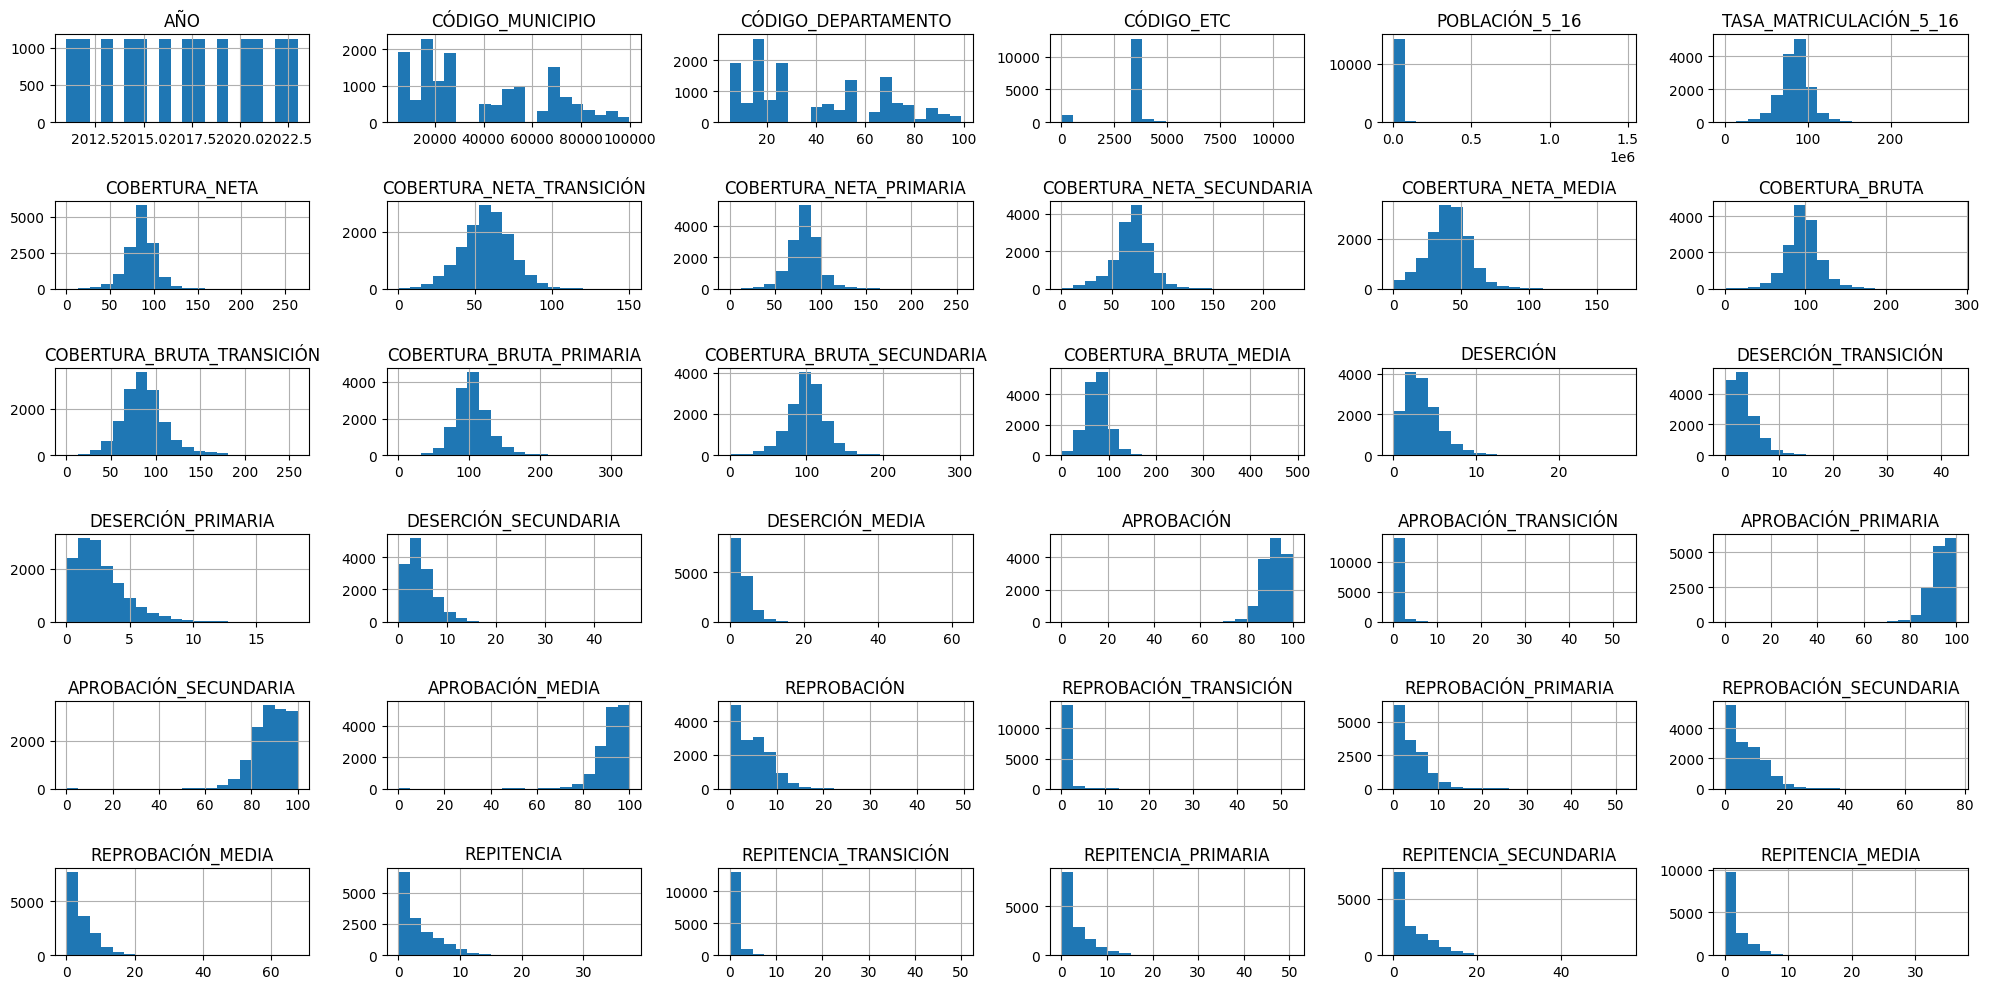

In [13]:
# Identificar patrones en los datos para detectar valores atípicos

df.hist(bins=20, figsize=(20, 10))
plt.tight_layout()
plt.show()

#### ¿Qué podemos concluir de esta distribución?

- **Consideración contextual:** Los outliers en educación a menudo representan realidades importantes (municipios con crisis educativa) que requieren atención especial, por lo cual se decide mantenerlos en el análisis.

- La alta variabilidad sugiere diferencias significativas entre municipios en términos de calidad y acceso educativo, lo que es crucial para políticas públicas focalizadas.

In [14]:
# Aquí podemos continuar con la exploración. Nos vemos chicas, gracias!!! <3 